# Проект: Предсказание температуры стали

**Описание проекта**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» (название вымышленное) решил уменьшить потребление электроэнергии на этапе обработки стали. Наобходимо построить модель, которая будет предсказывать температуру стали. Это позволит комбинату значительно экономить электроэнергию которая тратится на нагрев стали.

Необходимо получить значение мертики MAE выше 8.7 единиц.

Файлы с данными:
- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` — данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-файлов-с-данными" data-toc-modified-id="Загрузка-файлов-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка файлов с данными</a></span></li><li><span><a href="#Обзор--данных" data-toc-modified-id="Обзор--данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор  данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных-об-электродах" data-toc-modified-id="Обзор-данных-об-электродах-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Обзор данных об электродах</a></span></li><li><span><a href="#Обзор-данных-о-подаче-сыпучих-материалов-(объём)" data-toc-modified-id="Обзор-данных-о-подаче-сыпучих-материалов-(объём)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Обзор данных о подаче сыпучих материалов (объём)</a></span></li><li><span><a href="#Обзор-данных-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="Обзор-данных-о-подаче-сыпучих-материалов-(время)-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Обзор данных о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#Обзор-данных-о-продувке-сплава-газом" data-toc-modified-id="Обзор-данных-о-продувке-сплава-газом-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Обзор данных о продувке сплава газом</a></span></li><li><span><a href="#Обзор-данных-о-результаты-измерения-температуры" data-toc-modified-id="Обзор-данных-о-результаты-измерения-температуры-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Обзор данных о результаты измерения температуры</a></span></li><li><span><a href="#Обзор-данных-о-проволочных-материалах-(объём)" data-toc-modified-id="Обзор-данных-о-проволочных-материалах-(объём)-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Обзор данных о проволочных материалах (объём)</a></span></li><li><span><a href="#Обзор-данных-данные-о-проволочных-материалах-(время)" data-toc-modified-id="Обзор-данных-данные-о-проволочных-материалах-(время)-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Обзор данных данные о проволочных материалах (время)</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-и-исследование-данных" data-toc-modified-id="Подготовка-и-исследование-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка и исследование данных</a></span><ul class="toc-item"><li><span><a href="#Работа--с-колонками" data-toc-modified-id="Работа--с-колонками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа  с колонками</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Поиск-выбросов-и-аномалий" data-toc-modified-id="Поиск-выбросов-и-аномалий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск выбросов и аномалий</a></span><ul class="toc-item"><li><span><a href="#Таблица-с-электродами" data-toc-modified-id="Таблица-с-электродами-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Таблица с электродами</a></span></li><li><span><a href="#Таблицы-с-материалами" data-toc-modified-id="Таблицы-с-материалами-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Таблицы с материалами</a></span></li><li><span><a href="#Таблица-с-инертным-газом" data-toc-modified-id="Таблица-с-инертным-газом-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Таблица с инертным газом</a></span></li><li><span><a href="#Таблица-с-измерением-температуры" data-toc-modified-id="Таблица-с-измерением-температуры-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Таблица с измерением температуры</a></span></li></ul></li><li><span><a href="#Объединение-таблиц-и-создание-признаков" data-toc-modified-id="Объединение-таблиц-и-создание-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Объединение таблиц и создание признаков</a></span></li><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Создание выборок</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Тест-модели" data-toc-modified-id="Тест-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тест модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчёт</a></span></li></ul></div>

## Анализ данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor

### Загрузка файлов с данными

In [2]:
def open_csv(file_name):
    '''
    Функция для открытия файла из локальной или глобальной директории.
    Перед использованием функции необходимо указать директории файла.
    '''
    try:
        dataframe = pd.read_csv(file_patch_local+file_name+'.csv')
    except:
        dataframe = pd.read_csv(file_patch_global+file_name+'.csv')
    return dataframe

In [3]:
file_patch_local = 'Downloads/final_steel/'
file_patch_global = '/datasets/final_steel/'

df_arc = open_csv('data_arc')
df_bulk = open_csv('data_bulk')
df_bulk_time = open_csv('data_bulk_time')
df_gas = open_csv('data_gas')
df_temp = open_csv('data_temp')
df_wire = open_csv('data_wire')
df_wire_time = open_csv('data_wire_time')

### Обзор  данных

In [4]:
def df_overview(df):
    '''
    Обзор датафрейма по ключевым моментам:
    таблица, случайная выборка, общая информация, количество пропусков, описание, корреляции.
    '''
    print('Dataframe overview:\n')
    display(df.head())
    print('--------------------------------------------\nSample:\n')
    display(df.sample(10, random_state=555))
    print('--------------------------------------------\nInfo:\n')
    print(df.info())
    print('--------------------------------------------\nNaN\'s:\n')
    print(df.isna().sum())
    print('--------------------------------------------\nDescribe:\n')
    display(df.describe())
    print('--------------------------------------------\nFeature correlation:\n')
    display(df.corr())

#### Обзор данных об электродах

In [5]:
df_overview(df_arc)

Dataframe overview:



,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


--------------------------------------------
Sample:



,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
6858,1491,2019-06-26 04:08:20,2019-06-26 04:11:16,0.573416,0.399903
8128,1761,2019-07-05 02:39:21,2019-07-05 02:41:48,0.637629,0.457504
2945,641,2019-05-26 20:40:09,2019-05-26 20:44:26,0.983395,0.815896
10920,2377,2019-08-01 23:25:01,2019-08-01 23:26:51,0.368408,0.273990
12834,2789,2019-08-16 15:13:22,2019-08-16 15:21:23,2.082844,1.415731
12593,2735,2019-08-14 09:27:58,2019-08-14 09:31:35,0.688839,0.677694
14680,3194,2019-08-30 16:16:03,2019-08-30 16:18:19,0.448228,0.402300
6059,1320,2019-06-19 20:09:34,2019-06-19 20:12:28,0.580617,0.531824
8310,1809,2019-07-06 16:41:07,2019-07-06 16:46:33,1.245124,1.074717
481,103,2019-05-06 22:54:17,2019-05-06 22:55:24,0.252743,0.171481


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None
--------------------------------------------
NaN's:

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64
--------------------------------------------
Describe:



,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


--------------------------------------------
Feature correlation:



,key,Активная мощность,Реактивная мощность
key,1.000000,-0.021382,-0.004396
Активная мощность,-0.021382,1.000000,0.054437
Реактивная мощность,-0.004396,0.054437,1.000000


По первой таблице есть такие наблюдения:
- Временные колонки надо перевести в формат времени, чтобы можно было посчитать время нагрева.
-  В реактивной мощности есть какие-то выбросы с отрицательными значениями.
- Тут можно создать и добавить в таблицу пару дополнительных признаков:
    1. соотношение реактивной мощности к активной (коэффицент соотношения мощностей)
    2. продолжительность нагрева


#### Обзор данных о подаче сыпучих материалов (объём)

In [6]:
df_overview(df_bulk)

Dataframe overview:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


--------------------------------------------
Sample:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3009,3118,NaN,NaN,52.0,NaN,84.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN
2023,2094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,139.0,106.0
1381,1434,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.0,102.0
292,311,NaN,NaN,21.0,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,103.0,NaN,209.0,NaN
2006,2077,NaN,NaN,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,100.0,104.0
1854,1917,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,182.0,105.0
1416,1470,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,460.0,NaN,226.0,202.0
2022,2093,NaN,NaN,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,97.0,NaN
1409,1463,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,NaN,NaN
2703,2804,NaN,NaN,22.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN,104.0,416.0,NaN,216.0,104.0


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None
--------------------------------------------
NaN's:

key           0
Bulk 1     2877
Bulk 2     310

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


--------------------------------------------
Feature correlation:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,1.000000,-0.192066,-0.038643,-0.080335,-0.101955,-0.018074,-0.063539,-0.049425,NaN,0.262741,0.288135,-0.156748,-0.030981,0.050304,-0.149840,-0.169873
Bulk 1,-0.192066,1.000000,-0.073762,0.016731,-0.040465,-0.368980,0.141745,-0.086223,NaN,NaN,-0.278055,0.461895,0.370501,1.000000,0.409188,-0.119006
Bulk 2,-0.038643,-0.073762,1.000000,NaN,0.393882,0.070350,NaN,-0.010043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 3,-0.080335,0.016731,NaN,1.000000,-0.260918,0.144410,0.253080,NaN,NaN,0.072850,-0.244532,0.137997,0.011648,-0.582598,0.026257,-0.023689
Bulk 4,-0.101955,-0.040465,0.393882,-0.260918,1.000000,-0.077214,-0.333841,0.324940,NaN,0.766565,-0.516399,NaN,0.051112,-0.311659,0.022925,0.041190
Bulk 5,-0.018074,-0.368980,0.070350,0.144410,-0.077214,1.000000,-0.511112,0.304476,NaN,NaN,NaN,NaN,0.007650,NaN,-0.256040,-0.248216
Bulk 6,-0.063539,0.141745,NaN,0.253080,-0.333841,-0.511112,1.000000,NaN,NaN,NaN,NaN,-0.104251,-0.079822,0.844690,0.154429,-0.038363
Bulk 7,-0.049425,-0.086223,-0.010043,NaN,0.324940,0.304476,NaN,1.000000,NaN,NaN,NaN,NaN,0.538671,NaN,1.000000,NaN
Bulk 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 9,0.262741,NaN,NaN,0.072850,0.766565,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.946954,NaN,-0.479974,NaN


По второй таблице есть следующие наблюдения:
- тут получается показано, в какую партию сколько мы добавляем каждого вида сыпучего материала;
- есть пропуски, которые по всей видимости означают, что такой вид материала не добавлялся.
- значит здесь пропуски мы можем заменить на нули.

#### Обзор данных о подаче сыпучих материалов (время)

In [7]:
df_overview(df_bulk_time)

Dataframe overview:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


--------------------------------------------
Sample:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3009,3118,NaN,NaN,2019-08-28 02:46:22,NaN,2019-08-28 02:46:22,2019-08-28 02:46:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-28 02:41:04,NaN
2023,2094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-23 00:17:08,NaN,2019-07-23 00:17:08,2019-07-23 00:17:08
1381,1434,NaN,NaN,NaN,NaN,NaN,2019-06-23 23:17:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-23 22:53:03,2019-06-23 22:53:03
292,311,NaN,NaN,2019-05-14 23:14:54,NaN,NaN,2019-05-14 23:25:54,NaN,NaN,NaN,NaN,NaN,2019-05-14 23:09:15,NaN,2019-05-14 23:09:15,NaN
2006,2077,NaN,NaN,2019-07-22 11:05:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-22 10:59:49,NaN,2019-07-22 10:59:49,2019-07-22 10:59:49
1854,1917,NaN,NaN,2019-07-15 22:23:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-15 21:58:26,NaN,2019-07-15 21:58:26,2019-07-15 21:58:26
1416,1470,2019-06-25 12:22:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-25 12:33:34,NaN,2019-06-25 12:16:46,NaN,2019-06-25 12:16:46,2019-06-25 12:16:46
2022,2093,NaN,NaN,NaN,2019-07-22 22:39:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-22 22:30:00,NaN,2019-07-22 22:30:00,NaN
1409,1463,NaN,NaN,NaN,2019-06-25 05:18:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-25 05:26:55,NaN,NaN,NaN
2703,2804,NaN,NaN,2019-08-17 05:02:47,NaN,NaN,2019-08-17 04:44:35,NaN,NaN,NaN,NaN,2019-08-17 04:44:35,2019-08-17 04:31:33,NaN,2019-08-17 04:31:33,2019-08-17 04:31:33


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None
--------------------------------------------
NaN's:

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


--------------------------------------------
Feature correlation:



,key
key,1.0


В третьей таблице мы имеем временное представление связанное со второй таблицей, а именно: в какое время эти материалы добавлялись.

Думаю, можно попробовать объединить вторую таблицу с третьей и посмотреть на верность представленных данных, и именно: нет ли пропусков у одних данных где есть данные у других.

Плюс тут пропуски можно тоже заменить на нули, чтобы было проще проверять на соответсвие с количеством материалов.

#### Обзор данных о продувке сплава газом

In [8]:
df_overview(df_gas)

Dataframe overview:



,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


--------------------------------------------
Sample:



,key,Газ 1
2475,2478,17.371982
744,747,19.616468
2578,2581,8.978516
1901,1904,17.315358
1855,1858,8.775048
328,331,6.097726
2234,2237,17.826508
1106,1109,3.454271
3184,3187,19.436604
392,395,6.373480


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None
--------------------------------------------
NaN's:

key      0
Газ 1    0
dtype: int64
--------------------------------------------
Describe:



,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


--------------------------------------------
Feature correlation:



,key,Газ 1
key,1.000000,-0.040655
Газ 1,-0.040655,1.000000


В четвёртой таблице мы имеем дело с количеством инертного газа потраченного на продувку сплава. Пропусков в этих данных не наблюдается. Наблюдаются высокие значения относительно медианы, возможно есть выбросы в сторону максимальных значений. Возможно где-то был значительный перегрев сплава. Пропусков не наблюдается

#### Обзор данных о результаты измерения температуры

In [9]:
df_overview(df_temp)

Dataframe overview:



,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


--------------------------------------------
Sample:



,key,Время замера,Температура
7318,1488,2019-06-26 01:25:31,1591.0
15293,3107,2019-08-27 19:40:01,NaN
4034,802,2019-06-02 03:08:34,1596.0
6394,1293,2019-06-19 00:57:36,1585.0
171,31,2019-05-04 10:34:22,1598.0
15721,3199,2019-08-30 20:27:32,NaN
1168,209,2019-05-11 00:43:55,1667.0
4491,894,2019-06-05 08:32:11,1613.0
2885,558,2019-05-24 03:00:03,1589.0
2036,380,2019-05-17 17:20:55,1590.0


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None
--------------------------------------------
NaN's:

key                0
Время замера       0
Температура     2901
dtype: int64
--------------------------------------------
Describe:



,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


--------------------------------------------
Feature correlation:



,key,Температура
key,1.000000,-0.046895
Температура,-0.046895,1.000000


В пятой таблице у нас исмерение температуры на разных стадиях процесса.
Тут есть несколько замечаний:
- Имеются пропуски в измерениях, пока сложно сказать с чем это может быть связано. Возможно измерения не производились тогда, когда в сплав ничего не добавлялось.
- Есть некоторые отклонения в минимальную сторону.
- Колонки со временем измерения можно тоже перевести в формат даты.

Тут тоже можно попробовать создать дополнительные признаки:
- соотношение температуры с активной мощностью;
- соотношение температуры с реактивной мощностью;
- соотношение температуры с количеством газа для продувки;
- соотношение температуры с временем нагрева.

Но скорее всего, если мы создадим вышеперечисленные признаки, то у нас будет неявная утечка целевого признака, поэтому мы их создавать не будем.

#### Обзор данных о проволочных материалах (объём)

In [10]:
df_overview(df_wire)

Dataframe overview:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------
Sample:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2609,2743,85.132324,118.136719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,357,127.062004,9.168640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,518,163.332001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,1825,103.147202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,1517,120.042000,41.168400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,1060,166.701602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731,1820,182.988006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,2787,93.780957,100.402641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,28,99.153595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,1110,90.979202,73.077683,244.468246,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None
--------------------------------------------
NaN's:

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
--------------------------------------------
Describe:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


--------------------------------------------
Feature correlation:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,1.000000,-0.083352,-0.005461,-0.084460,0.389064,NaN,0.082274,0.578898,0.323891,-0.012200
Wire 1,-0.083352,1.000000,-0.030892,0.724370,0.054001,NaN,-0.280807,-0.035072,0.068697,0.010104
Wire 2,-0.005461,-0.030892,1.000000,-0.081852,NaN,NaN,-0.265706,NaN,0.250477,0.011019
Wire 3,-0.084460,0.724370,-0.081852,1.000000,0.069854,NaN,-0.221602,-0.056948,NaN,NaN
Wire 4,0.389064,0.054001,NaN,0.069854,1.000000,NaN,0.237456,-0.404865,NaN,NaN
Wire 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 6,0.082274,-0.280807,-0.265706,-0.221602,0.237456,NaN,1.000000,-0.224093,NaN,NaN
Wire 7,0.578898,-0.035072,NaN,-0.056948,-0.404865,NaN,-0.224093,1.000000,NaN,NaN
Wire 8,0.323891,0.068697,0.250477,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Wire 9,-0.012200,0.010104,0.011019,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


В шестой таблице у нас аналогичная ситуация как со второй таблицей. Тоже пропуски можно заменить нулями.


#### Обзор данных данные о проволочных материалах (время)

In [11]:
df_overview(df_wire_time)

Dataframe overview:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------
Sample:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2609,2743,2019-08-14 23:13:26,2019-08-14 23:16:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,357,2019-05-16 20:00:50,2019-05-16 20:14:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,518,2019-05-22 15:12:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,1825,2019-07-07 06:22:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,1517,2019-06-27 01:01:57,2019-06-27 01:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,1060,2019-06-11 04:13:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731,1820,2019-07-07 01:52:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,2787,2019-08-16 13:41:56,2019-08-16 13:46:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,28,2019-05-04 08:35:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,1110,2019-06-12 20:23:43,2019-06-12 20:10:50,2019-06-12 20:11:25,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None
--------------------------------------------
NaN's:

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
--------------------------------------------
Describe:



,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


--------------------------------------------
Feature correlation:



,key
key,1.0


И в седьмой таблице, так-же как в третьей: можно объединить с шестой и проверить на соответствие имеющихся данных, заменить пропуски на нули.

#### Выводы

Вопросы пока такие:
- Что делать с выбросами в некоторых значениях? Удалять их скорее всего нельзя. Надо определиться что с ними делать, на какие значения менять т надо-ли вообще менять.
- Нужны ли нам временные измерения в таблицах с добавлением материалов? Возможно достаточно знать в какой сплав мы добавили сколько материалов.
- Что делать с пропусками в измерениях температуры?

План пока такой:
- Провести подготовку:
    - заменить пропуски;
    - привести некоторые колонки в нужные форматы.
- Объединить некоторые таблицы:
    - можно попробовать объединить таблицы 2-3 и 6-7 как уже писал выше;
    - можно попробовать объединить все таблицы для получения общей, по которой будет проводиться обучение и тест модели.
- Провести анализ данных. Посмотреть на зависимости, аномалии. Изучить процесс более подробно.
- Понять, какие признаки использовать для обучения модели и какие ещё можно добавить.
- Определиться какие модели лучше использовать в нашем случае. Какие признаки имеют высокую корреляцию, и какие оказались наиболее важными для обучения модели.
- Провести обучение и тест моделей.

## Подготовка и исследование данных

### Работа  с колонками

Сначала немного косметики. Мне не нравится, что названия колонок в таблицах на разных языках и в разном регистре. Сделаем все колонки на английском и с нижним регистром. Воспользуемся функцией:

In [12]:
def rename_columns(df, new_columns):
    '''
    Функция для переименования колонок в датафрейме.
    В параметре `new_columns` необходимо указать новые названия колонок в формате:
    ['col_1', 'col_2', 'col_3', ... 'con_n']
    Либо, если нужно перевести все колонки в нижний регистр:
    df.columns.str.lower()
    '''
    col_dict = {}
    for i in range(len(df.columns)):
        col_dict[df.columns[i]] = new_columns[i]
    df.rename(columns=col_dict, inplace=True)
    return df

In [13]:
columns_for_rename = ['key', 'arc_heating_start',
                      'arc_heating_end', 'active_power', 'reactive_power'
                     ]
rename_columns(df_arc, columns_for_rename)
df_arc.head()

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [14]:
rename_columns(df_bulk, df_bulk.columns.str.lower())
df_bulk.head()

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


В третьей и седьмой таблице в название колонок добавим "time". Только оставим название колонки `key` как есть:

In [15]:
rename_columns(df_bulk_time, df_bulk_time.columns.str.lower()+' time')
df_bulk_time.rename(columns={'key time' : 'key'}, inplace=True)
df_bulk_time.head()

,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [16]:
rename_columns(df_gas, ['key','gas'])
df_gas.head()

,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [17]:
rename_columns(df_temp, ['key', 'measurement_time', 'temperature'])
df_temp.head()

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [18]:
rename_columns(df_wire, df_wire.columns.str.lower())
df_wire.head()

,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
rename_columns(df_wire_time, df_wire_time.columns.str.lower()+' time')
df_wire_time.rename(columns={'key time' : 'key'}, inplace=True)
df_wire_time.head()

,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь переведём колонки в таблицах с электродами и температурой в формат времени:

In [20]:
def to_date_time(df):
    '''
    Функция для перевода выбранной колонки в формат времени.
    '''
    return pd.to_datetime(df, format='%Y-%m-%d %H:%M:%S')

In [21]:
df_arc['arc_heating_start'] = to_date_time(df_arc['arc_heating_start'])
df_arc['arc_heating_end'] = to_date_time(df_arc['arc_heating_end'])
df_temp['measurement_time'] = to_date_time(df_temp['measurement_time'])

Заполним пропуски в таблицах с материалами на нули:

In [22]:
df_bulk.fillna(0, inplace=True)
df_bulk_time.fillna(0, inplace=True)
df_wire.fillna(0, inplace=True)
df_wire_time.fillna(0, inplace=True)

Посмотрим на таблицы с добавлением материалов, проверим правильность сбора данных и заодно решим, что делать с колонками. А именно: надо их переводить в формат времени или нет.

Объединим таблицы `bulk` и `bulk_time`.

In [23]:
df_bulk_and_time = df_bulk.merge(df_bulk_time, on='key', how='left')
df_bulk_and_time.head()

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,...,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2019-05-03 11:03:52,0,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2019-05-03 11:40:20,0,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2019-05-03 12:09:40,0,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2019-05-03 12:41:24,0,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2019-05-03 13:12:56,0,2019-05-03 13:12:56,2019-05-03 13:12:56


In [24]:
df_bulk_and_time[['bulk 4', 'bulk 4 time']].sample(10, random_state=10)

,bulk 4,bulk 4 time
2357,0.0,0
705,77.0,2019-05-30 15:00:22
1911,108.0,2019-07-18 18:44:10
556,58.0,2019-05-25 00:43:51
2952,0.0,0
1943,139.0,2019-07-20 07:18:49
3028,0.0,0
2562,0.0,0
1385,193.0,2019-06-24 03:58:35
25,0.0,0


Взял для примера четвёртый материал. Похоже, что сбор данных проводился верно.

Теперь проверим всю таблицу на предмет соответствия по сбору данных.

In [25]:
def data_collection(df):
    '''
    Функция, которая сверяет количество значений в колонках.
    '''
    print('Количество значений с данными в колонках:')
    result = {}
    for col in range(len(df.columns)):
        result[df.columns[col]] = (df[[df.columns[col]]][df.columns[col]] != 0).sum()

    results = pd.Series(index=result, data=result.values())
    print(results.sort_index())

In [26]:
data_collection(df_bulk_and_time)

Количество значений с данными в колонках:
bulk 1           252
bulk 1 time      252
bulk 10          176
bulk 10 time     176
bulk 11          177
bulk 11 time     177
bulk 12         2450
bulk 12 time    2450
bulk 13           18
bulk 13 time      18
bulk 14         2806
bulk 14 time    2806
bulk 15         2248
bulk 15 time    2248
bulk 2            22
bulk 2 time       22
bulk 3          1298
bulk 3 time     1298
bulk 4          1014
bulk 4 time     1014
bulk 5            77
bulk 5 time       77
bulk 6           576
bulk 6 time      576
bulk 7            25
bulk 7 time       25
bulk 8             1
bulk 8 time        1
bulk 9            19
bulk 9 time       19
key             3129
dtype: int64


Как видно, сумма измерений в столбцах количества материалов и времени их добавления совпадают. Значит сбор данных проводился корректно.

Теперь произведём те-же действия в таблицах `wire` и `wire_time`:

In [27]:
df_wire_and_time = df_wire.merge(df_wire_time, on='key', how='left')
df_wire_and_time.head()

,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 11:11:41,0,0,0,0,0,0,0,0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 11:46:10,0,0,0,0,0,0,0,0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 12:13:47,0,0,0,0,0,0,0,0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 12:48:05,0,0,0,0,0,0,0,0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 13:18:15,2019-05-03 13:32:06,0,0,0,0,0,0,0


In [28]:
df_wire_and_time[['wire 2', 'wire 2 time']].sample(10, random_state=10)

,wire 2,wire 2 time
2556,45.209839,2019-08-12 20:18:15
2433,3.981120,2019-08-08 06:23:19
263,45.135998,2019-05-14 03:20:51
1277,0.000000,0
1353,0.000000,0
2526,19.030960,2019-08-11 21:57:49
2792,0.000000,0
1323,98.050155,2019-06-22 15:40:40
828,0.000000,0
1924,0.000000,0


In [29]:
data_collection(df_wire_and_time)

Количество значений с данными в колонках:
key            3081
wire 1         3055
wire 1 time    3055
wire 2         1079
wire 2 time    1079
wire 3           63
wire 3 time      63
wire 4           14
wire 4 time      14
wire 5            1
wire 5 time       1
wire 6           73
wire 6 time      73
wire 7           11
wire 7 time      11
wire 8           19
wire 8 time      19
wire 9           29
wire 9 time      29
dtype: int64


Тут аналогичная ситуация. Ошибок в наблюдениях не наблюдается.

Переводить колонки в таблицах `bulk_time` и `wire_time` в формат времени я смысла не вижу, потому как в дальнейшем эти данные в общую таблицу не попадут.

### Работа с пропусками

У нас есть пропуски в целевой таблице. Посмотрим на них подробнее:

In [30]:
df_temp.sample(5, random_state=10)

,key,measurement_time,temperature
12770,2596,2019-08-09 14:56:38,NaN
12997,2642,2019-08-11 05:10:25,NaN
6510,1317,2019-06-19 17:57:40,1574.0
4980,998,2019-06-08 23:34:18,1586.0
6413,1297,2019-06-19 04:38:57,1590.0


Посмотрим на некоторые партии, где есть пропуски:

In [31]:
df_temp[df_temp['temperature'].isna()]['key'].value_counts().sample(10, random_state=0)

2715    5
2950    5
2799    9
2917    7
2790    2
2873    2
3163    4
2709    2
3132    3
3134    8
Name: key, dtype: int64

Как видно, в разных партиях разное количество пропусков. Возьмём несколько партий и посмотрим подробнее:

In [32]:
display(df_temp[df_temp['key'] == 2799])
display(df_temp[df_temp['key'] == 3163])
display(df_temp[df_temp['key'] == 3132])

,key,measurement_time,temperature
13761,2799,2019-08-17 00:41:07,1594.0
13762,2799,2019-08-17 00:41:40,NaN
13763,2799,2019-08-17 00:51:25,NaN
13764,2799,2019-08-17 01:05:41,NaN
13765,2799,2019-08-17 01:16:56,NaN
13766,2799,2019-08-17 01:24:39,NaN
13767,2799,2019-08-17 01:30:41,NaN
13768,2799,2019-08-17 01:35:23,NaN
13769,2799,2019-08-17 01:41:18,NaN
13770,2799,2019-08-17 01:42:09,NaN


,key,measurement_time,temperature
15558,3163,2019-08-29 11:15:15,1580.0
15559,3163,2019-08-29 11:24:02,NaN
15560,3163,2019-08-29 11:30:12,NaN
15561,3163,2019-08-29 11:30:44,NaN
15562,3163,2019-08-29 11:34:06,NaN


,key,measurement_time,temperature
15403,3132,2019-08-28 14:38:02,1575.0
15404,3132,2019-08-28 14:44:27,NaN
15405,3132,2019-08-28 14:55:45,NaN
15406,3132,2019-08-28 14:59:03,NaN


Как мы видим, у этих партий присутствует только первичное измерение температуры.

Чтобы лучше разобраться, просмотрим на процесс более подробно. Создадим функцию для визуализации процесса:

In [33]:
def plot_create(x, y):
    '''Построение графика'''
    plt.plot(x, y, '-o', label=y.name)

In [34]:
def process_visualisation(key_number):
    plt.figure(figsize=(14, 6))
    
    '''Отображение графика с изменением температуры'''
    plt.subplot(211)
    plt.title('Key - {}'.format(key_number))
    plot_create(df_temp[df_temp['key'] == key_number]['measurement_time'],
                df_temp[df_temp['key'] == key_number]['temperature'])
    plt.legend()
    plt.ylabel('temperature')
    
    '''Отображение графика нагреваня тенов'''
    plt.subplot(212)
    plot_create(df_arc[df_arc['key'] == key_number]['arc_heating_start'],
                df_arc[df_arc['key'] == key_number]['active_power'])
    plot_create(df_arc[df_arc['key'] == key_number]['arc_heating_end'],
                df_arc[df_arc['key'] == key_number]['reactive_power'])
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('power')
    
    plt.show()
    
    '''Таблицы с информацией о добавлении компонентов'''
    display(df_bulk[df_bulk['key'] == key_number])
    display(df_bulk_time[df_bulk_time['key'] == key_number])
    display(df_wire[df_wire['key'] == key_number])
    display(df_wire_time[df_wire_time['key'] == key_number])

Возьмём одну партию без пропусков и одну с пропусками. Сперва без пропусков:

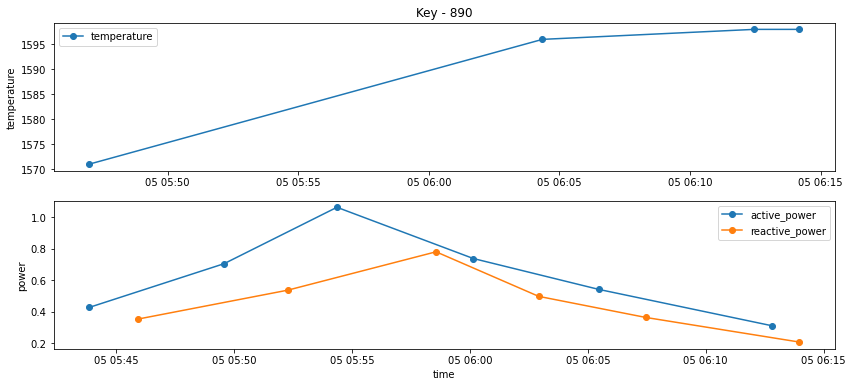

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
854,890,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0,0.0,198.0,156.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
854,890,0,0,0,2019-06-05 06:00:16,0,0,0,0,0,0,0,2019-06-05 05:49:32,0,2019-06-05 05:49:32,2019-06-05 05:49:32


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
836,890,80.215194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
836,890,2019-06-05 05:59:21,0,0,0,0,0,0,0,0


In [35]:
process_visualisation(890)

Какой процесс тут наблюдается:
- измерили температуру - начали греть;
- в процессе нагревания, добавлялись компоненты;
- потом снова измеряли температуру и поддерживали её на нужном уровне.

Теперь партия с пропусками:

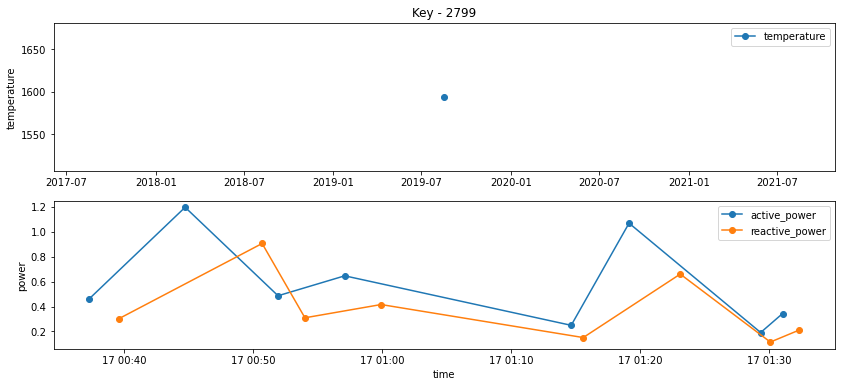

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
2698,2799,0.0,0.0,0.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,416.0,0.0,204.0,104.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
2698,2799,0,0,0,2019-08-17 00:56:23,0,0,0,0,0,0,0,2019-08-17 00:45:32,0,2019-08-17 00:45:32,2019-08-17 00:45:32


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
2660,2799,176.336166,59.234241,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
2660,2799,2019-08-17 00:55:35,2019-08-17 00:57:02,0,0,0,0,0,0,0


In [36]:
process_visualisation(2799)

Тут мы видим, что котёл подогревали 8 раз в течении часа и в процессе подогрева добавлялись разные компоненты. Но измерение температуры проводилось только один раз.

Значит была какая-то ошибка в снятии или записи показаний датчика температуры в процессе производства некоторых партий. (Или какой-то злодей их специально стёр 🥸)

Посмотрим, какой процент от всех партий у нас с ошибками в измерении температуры:

In [37]:
key_count = (df_temp['key'].nunique())
key_with_nan_count = df_temp[df_temp['temperature'].isna()]['key'].nunique()
print(
    'Процент партий с ошибками в измерениях температуры: {}%'
    .format(round((key_with_nan_count / key_count * 100), 2))
)

Процент партий с ошибками в измерениях температуры: 22.98%


Таким образом, можно прийти к следующим выводам:

Если мы из целевой таблицы будем удалять прям по партиям, где есть пропуски в измерениях температуры. То мы потеряем довольно много информации, так как таких партий у нас почти 23%.

А если мы будем удалять только строки с пропусками, то получится искажение информации по процессу производства. И тогда модель возможно будет хорошо предсказывать на наших данных, но в реальных условиях может привести к серьёзным ошибкам.

В итоге получается, что лучше потерять часть данных для обучения модели, чем получить переобученную модель. Значит будем удалять партии, где есть пропуски.

Так как нам надо удалять не просто строки с пропусками, а именно партии в которых есть пропуски, то сделаем список таких партий и на его основе произведём удаление: 

In [38]:
keys_to_drop = df_temp[df_temp['temperature'].isna()]['key'].unique()
keys_to_drop

array([2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510,
       2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521,
       2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532,
       2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543,
       2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554,
       2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565,
       2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576,
       2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620,
       2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631,
       2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 26

Видно, что у нас нерелевантные партии, начинаются с 2500-ой.

Произведём удаление:

In [39]:
def drop_defect(df):
    '''
    Функция для удаления нерелевантных партий из датафрейма.
    '''
    for i in keys_to_drop:
        df.drop(df[df['key'] == i].index, inplace=True)    
    return df

In [40]:
df_temp = drop_defect(df_temp)
df_temp

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
12262,2498,2019-08-06 02:19:26,1593.0
12263,2498,2019-08-06 02:25:31,1594.0
12264,2499,2019-08-06 02:40:25,1569.0
12265,2499,2019-08-06 02:54:24,1604.0


In [41]:
df_temp.isna().sum()

key                 0
measurement_time    0
temperature         0
dtype: int64

Удаление прошло успешно. Остались партии в диапазоне с 1-ой по 2499-ю. Проверим:

In [42]:
print('Было всего партий:', key_count,
      '\nБыло партий с пропусками:', key_with_nan_count,
      '\nДолжно остаться:', key_count - key_with_nan_count,
      '\nОсталось:', df_temp['key'].nunique())

Было всего партий: 3216 
Было партий с пропусками: 739 
Должно остаться: 2477 
Осталось: 2477


Теперь, чтобы не было путаницы, нам надо исключить информацию об этих партиях из остальных таблиц. 

In [43]:
df_arc = drop_defect(df_arc)
df_bulk = drop_defect(df_bulk)
df_bulk_time = drop_defect(df_bulk_time)
df_gas = drop_defect(df_gas)
df_wire = drop_defect(df_wire)
df_wire_time = drop_defect(df_wire_time)

Проверим как прошло удаление. У нас последняя партия должна быть - 2499:

In [44]:
print('arc   ', df_arc['key'].tail().values)
print('bulk  ', df_bulk['key'].tail().values)
print('bulk_t', df_bulk_time['key'].tail().values)
print('gas   ', df_gas['key'].tail().values)
print('temp  ', df_temp['key'].tail().values)
print('wire  ', df_wire['key'].tail().values)
print('wire_t', df_wire_time['key'].tail().values)

arc    [2498 2499 2499 2499 2499]
bulk   [2495 2496 2497 2498 2499]
bulk_t [2495 2496 2497 2498 2499]
gas    [2498 2499 2683 3200 3207]
temp   [2498 2498 2499 2499 2499]
wire   [2495 2496 2497 2498 2499]
wire_t [2495 2496 2497 2498 2499]


Как видно, в таблице с газом, у нас есть еще какие-то партии, которых нет у остальных. Проверим, есть ли такие партии в других таблицах:

In [45]:
print('2683:', (df_temp['key'] == 2683).any(), (df_bulk['key'] == 2683).any(),
      (df_arc['key'] == 2683).any(), (df_wire['key'] == 2683).any(), sep=' | ')
print('3200:', (df_temp['key'] == 3200).any(), (df_bulk['key'] == 3200).any(),
      (df_arc['key'] == 3200).any(), (df_wire['key'] == 3200).any(), sep=' | ')
print('3207:', (df_temp['key'] == 3207).any(), (df_bulk['key'] == 3207).any(),
      (df_arc['key'] == 3207).any(), (df_wire['key'] == 3207).any(), sep=' | ')

2683: | False | False | False | False
3200: | False | False | False | False
3207: | False | False | False | False


Нет. Значит в таблице с газом, у нас есть лишняя информация по партиям.

Тогда провери все таблицы. Посчитаем количество партий в таблицах:

In [46]:
print(
    df_arc['key'].nunique(),
    df_bulk['key'].nunique(),
    df_gas['key'].nunique(),
    df_temp['key'].nunique(),
    df_wire['key'].nunique(), sep='\n')

2475
2408
2500
2477
2373


Как видно во всех таблицах немного разная информация по партиям. Значит, при объединении таблиц у нас будут пропуски в тех партиях, которых нет во всех таблицах и можно будет их удалить.

### Поиск выбросов и аномалий

Перед тем как приступать к объединению таблиц, следует разобраться с аномалиями. На этапе изучения данных, мы видели некоторые отклонения от стандартного распределения в данных. Посмотрим на них повнимательнее:

#### Таблица с электродами

In [47]:
df_arc.describe()

,key,active_power,reactive_power
count,11449.000000,11449.000000,11449.000000
mean,1242.137567,0.676118,0.441344
std,718.945523,0.408527,6.698882
min,1.000000,0.030002,-715.504924
25%,623.000000,0.398342,0.291740
50%,1245.000000,0.561328,0.417514
75%,1870.000000,0.864459,0.645321
max,2499.000000,3.731596,2.676388


Вот например в колонках с активной и реактивной мощностью, у нас наблюдаются значительные отклонения от 25-го и 75-го перцентилей. Особенно странным выглядит отрицательное значение в реактивной мощности.
Стоит взглянуть на это более подробно:

In [48]:
df_arc[df_arc['reactive_power'] < 0]

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


У нас одна запись с отрицательным значением. Посмотрим на эту партию:

In [49]:
display(df_arc[df_arc['key'] == 2116])
display(df_temp[df_temp['key'] == 2116])

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


,key,measurement_time,temperature
10462,2116,2019-07-24 00:32:59,1579.0
10463,2116,2019-07-24 00:44:34,1574.0
10464,2116,2019-07-24 00:50:58,1578.0
10465,2116,2019-07-24 00:53:31,1578.0


Как видно, процесс проходил в штатном режиме, но одно наблюдение было ошибочным. Возможно какой-то сбой в работе датчика.

Можно отбраковать всю партию, но мы и так уже отбросили почти 25% от всех партий. Чтобы не терять и эти данные, есть у меня такая мысль:<br>
У нас есть закономерность - активная мощность всегда выше чем реактивная. Мы можем взять среднее или медианное соотношение реактивной мощности к активной и на его основе восстановать примерное значение реактивной мощности в ошибочном наблюдении.

Чтобы быть менее зависымыми от выбросов, возьмём медианные значения и посчитаем соотношение:

In [50]:
pwr_coef = df_arc['reactive_power'].median() / df_arc['active_power'].median()
pwr_coef

0.7437962461277333

Теперь на основании получившегося коэффициента восстановим примерное значение ошибочного наблюдения:

In [51]:
df_arc.loc[9780, 'reactive_power'] = df_arc.loc[9780, 'active_power'] * pwr_coef
display(df_arc[df_arc['key'] == 2116])

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,0.368761
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


Выглядит довольно правдоподобно. 

С аномалией разобрались. Теперь посмотрим на выбросы:

In [52]:
def box_create(df):
    '''Создание боксплота'''
    plt.boxplot(df)
    plt.ylabel(df.name)
    plt.title(df.name)

In [53]:
def view_box(df_1, df_2):
    '''
    Вывод на экран двух боксплотов.
    Если надо вывести только один боксплот,
    то для этого вместо переменной `df_2` должен стоять `None`
    '''
    if df_2 is None:
        plt.figure(figsize=(4, 8))
        box_create(df_1)
    
    else:
        plt.figure(figsize=(10, 8))
        plt.subplot(121)
        box_create(df_1)
        plt.subplot(122)
        box_create(df_2)
        
    plt.show()

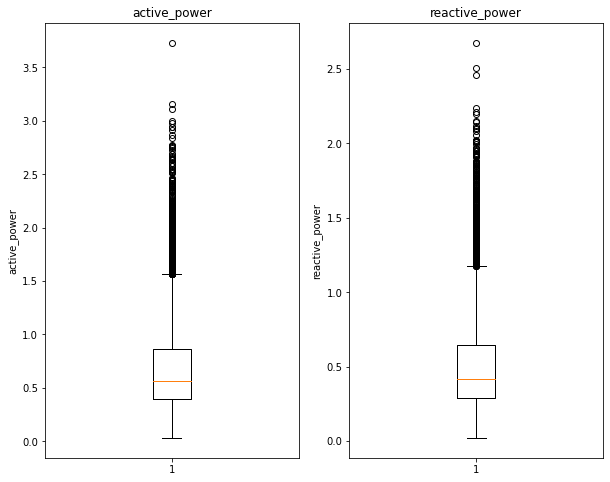

In [54]:
view_box(df_arc['active_power'], df_arc['reactive_power'])

Тут мы видим довольно большое количество выбросов в большую сторону. Есть по три максимальных выброса в обоих наблюдениях. Посмотрим с чем они связаны:

In [55]:
display(df_arc[df_arc['active_power'] > 3])
display(df_arc[df_arc['reactive_power'] > 2.3])

,key,arc_heating_start,arc_heating_end,active_power,reactive_power
7799,1689,2019-07-02 18:49:03,2019-07-02 19:04:10,3.731596,2.676388
9226,2001,2019-07-19 20:19:15,2019-07-19 20:31:16,3.156276,2.504206
9870,2139,2019-07-24 17:01:13,2019-07-24 17:12:06,3.107820,1.946782


,key,arc_heating_start,arc_heating_end,active_power,reactive_power
7799,1689,2019-07-02 18:49:03,2019-07-02 19:04:10,3.731596,2.676388
9226,2001,2019-07-19 20:19:15,2019-07-19 20:31:16,3.156276,2.504206
9361,2029,2019-07-20 20:19:38,2019-07-20 20:28:44,2.019395,2.459959


Почти все эти выбросы у одних и тех-же партий. Посмотрим на одну из них, которая есть и там и там:

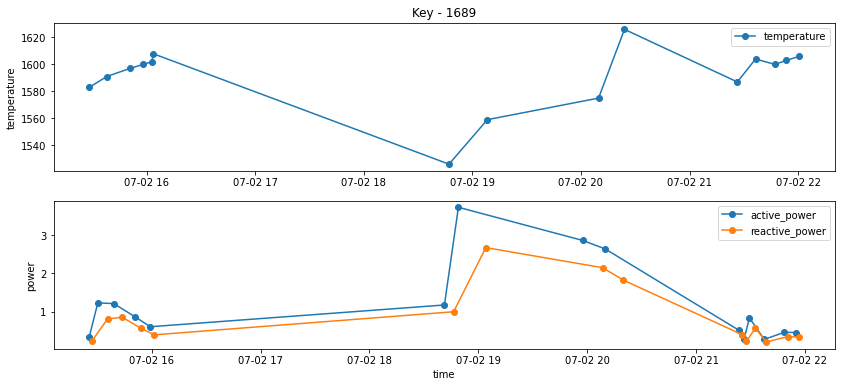

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
1629,1689,0.0,0.0,0.0,0.0,0.0,247.0,0.0,0.0,0.0,0.0,0.0,733.0,305.0,248.0,224.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
1629,1689,0,0,0,0,0,2019-07-02 15:45:57,0,0,0,0,0,2019-07-02 15:33:13,2019-07-02 18:49:35,2019-07-02 15:33:13,2019-07-02 15:33:13


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1609,1689,187.153206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
1609,1689,2019-07-02 15:45:22,0,0,0,0,0,0,0,0


In [56]:
process_visualisation(1689)

Получается, что в 15:33 и 15:45 было добавлено сразу много материалов, потом почти до 19 часов котёл не нагревали и он немного остыл. Потом добавили ещё материалы и начали активно нагревать. Отсюда и взялся такой всплеск мощности.

Взглянем на ещё один выброс:

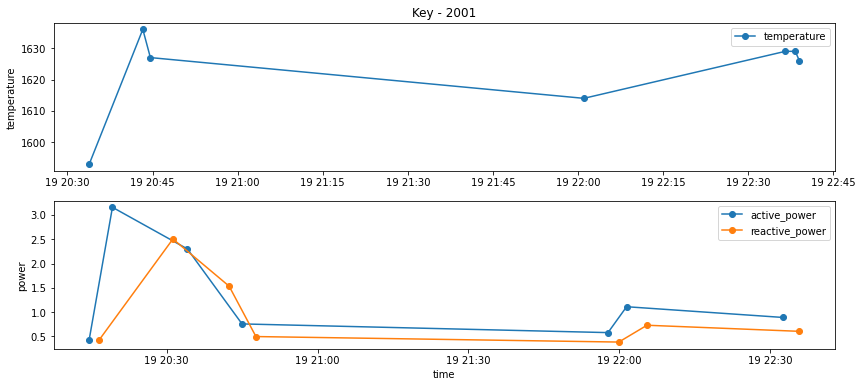

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
1935,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570.0,0.0,289.0,295.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
1935,2001,0,0,0,0,0,0,0,0,0,0,0,2019-07-19 20:19:20,0,2019-07-19 20:19:20,2019-07-19 20:19:20


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1907,2001,39.18096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
1907,2001,2019-07-19 20:42:55,0,0,0,0,0,0,0,0


In [57]:
process_visualisation(2001)

В этом случае, в 20:19 добавили сразу большое количество материалов и сразу стали сильно греть, чтобы поднять температуру до нужных значений. После, только поддерживали температуру.

Значит, выбросы в данных с нагревом это не ошибки, а результаты технологичестого процесса. Где добавлялось много материалов, требовалось больших затрат мощности на подогрев до нужной температуры.

#### Таблицы с материалами

Значит в таблицах с материалами, скорее всего тоже будут выбросы там, где в процессе добавлялось много материалов:

In [58]:
display(df_bulk.describe())
display(df_wire.describe())

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
count,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000,2408.000000
mean,1251.150748,3.315199,1.375831,46.038206,36.202658,2.553571,21.968023,1.958472,0.020349,0.430233,4.887043,4.105897,209.009136,1.032392,153.759136,116.896595
std,716.611468,12.222011,18.768071,74.609824,58.148525,22.036615,55.223655,30.184682,0.998545,6.118219,20.591354,22.155829,156.267789,14.000793,81.945893,85.597708
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,631.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000
50%,1252.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,106.000000
75%,1867.250000,0.000000,0.000000,76.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.000000,0.000000,204.000000,204.000000
max,2499.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
count,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.0,2373.000000,2373.000000,2373.000000,2373.000000
mean,1251.101138,102.263127,17.848852,3.174934,0.300866,0.0,0.960671,0.006243,0.305539,0.414144
std,716.092572,43.632071,33.939043,27.685932,4.713593,0.0,8.613305,0.203790,4.361884,4.330773
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,629.000000,72.961197,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1254.000000,101.087997,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1869.000000,128.138395,23.162880,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2499.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,90.053604


Видно, что чаще всего добавляются компоненты `bulk 12` и `wire 1`. Посмотрим на выбросы в этих колонках:

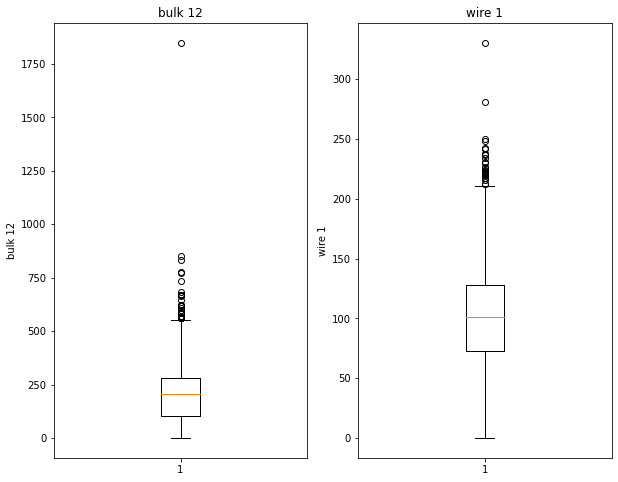

In [59]:
view_box(df_bulk['bulk 12'], df_wire['wire 1'])

Тут у нас тоже есть выбросы в большую сторону. Их можно как раз отнести к технологическому процессу. Думаю стоит только взглянуть на партию с выбросом в `bulk 12`, который сильно выделяется, и на один сильно выделяющийся в `wire 1`.

In [60]:
display(df_bulk[df_bulk['bulk 12'] > 1750])
display(df_wire[df_wire['wire 1'] > 300])

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
303,322,185.0,0.0,101.0,58.0,0.0,0.0,406.0,0.0,0.0,0.0,0.0,1849.0,0.0,636.0,0.0


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1732,1821,330.314424,69.337838,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Чтобы разобраться, посмотрим на процессы в этих партиях:

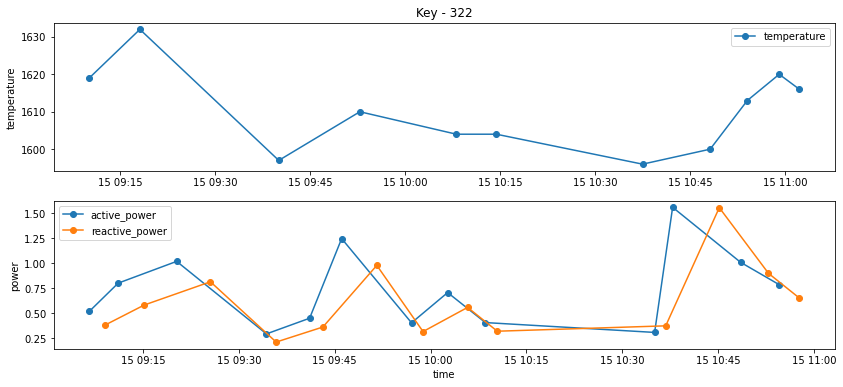

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
303,322,185.0,0.0,101.0,58.0,0.0,0.0,406.0,0.0,0.0,0.0,0.0,1849.0,0.0,636.0,0.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
303,322,2019-05-15 09:27:40,0,2019-05-15 09:35:53,2019-05-15 09:58:38,0,0,2019-05-15 09:35:53,0,0,0,0,2019-05-15 09:22:19,0,2019-05-15 09:22:19,0


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
299,322,0.0,188.22855,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
299,322,0,2019-05-15 09:37:48,0,0,0,0,0,0,0


In [61]:
process_visualisation(322)

Видим, что в 9:22 и 9:35 было добавлено много материалов и температура значительно снизилась. И с 9:35 по 11 часов котёл активно подогревали, чтобы набрать температуру. Ничего аномального здесь не наблюдается, всё в рамках технологического процесса.

Посмотрим на вторую интересующую нас партию.

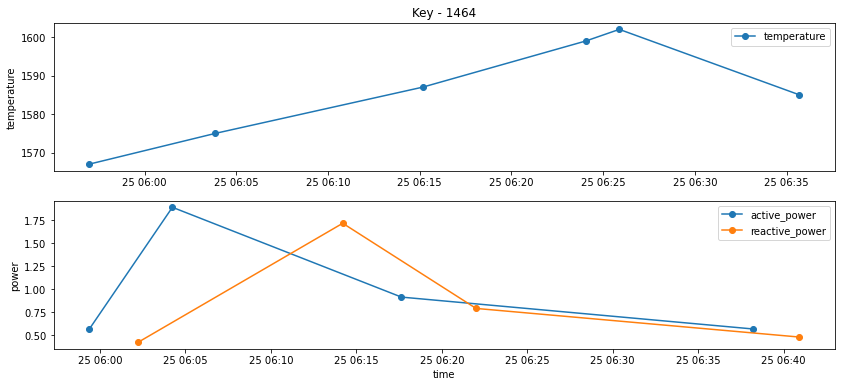

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
1410,1464,31.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,774.0,0.0,306.0,100.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
1410,1464,2019-06-25 06:18:12,0,0,2019-06-25 06:11:17,0,0,0,0,0,0,0,2019-06-25 06:05:44,0,2019-06-25 06:05:44,2019-06-25 06:05:44


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1392,1464,280.987214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
1392,1464,2019-06-25 05:59:09,0,0,0,0,0,0,0,0


In [62]:
process_visualisation(1464)

Тоже, не вижу ничего необычного. В 5:59 и в 6:05 добавили большое количество материалов, и до 6:30 грели до нужной температуры.

С таблицами по материалам разобрались. Все выбросы в рамках технологического процесса.

#### Таблица с инертным газом

Далее посмотрим на таблицу с инертным газом:

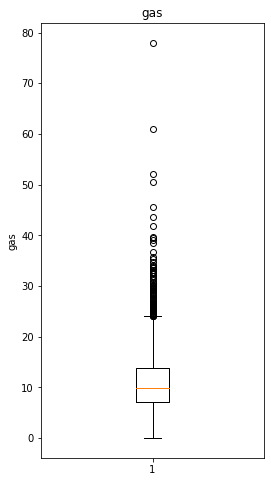

In [63]:
view_box(df_gas['gas'], None)

У газа тоже есть выбросы в большую сторону. Посмотрим на партии из двух последних выбросов:

In [64]:
df_gas[df_gas['gas'] > 60]

,key,gas
277,280,60.935689
319,322,77.995040


Партию 322 мы уже видели, когда смотрели на выбросы в данных с материалами. Там было большое добавление материалов с последующим продолжительным нагревом. Отсюда вероятно и большое количество потраченного газа для регулирования температуры.

Значит посмотрим только на 280-ю партию:

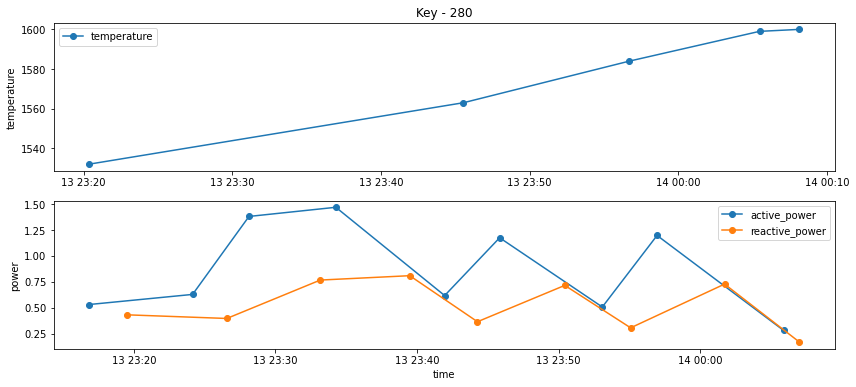

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
262,280,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,108.0,0.0,263.0,0.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
262,280,0,0,2019-05-13 23:51:46,0,0,0,0,0,2019-05-14 00:04:56,0,0,2019-05-13 23:23:23,0,2019-05-13 23:23:23,0


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
257,280,160.174557,76.236166,0.0,0.0,0.0,0.0,0.0,46.002319,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
257,280,2019-05-13 23:40:41,2019-05-13 23:52:04,0,0,0,0,0,2019-05-14 00:03:32,0


In [65]:
process_visualisation(280)

Тут явно наблюдаются три итерации активного подогрева. Перед каждой итерацией нагрева добавлялись разные материалы, но в относительно небольших количествах. Видимо, чтобы не перегреть сплав, пришлось использовать много газа.

Выходит, что в таблице с инертным газом, выбросы тоже имеют под собой основания. Возможно такие выбросы возникают в результате нештатных ситуаций на производстве, но в целом, их всё-равно можно уложить в рамки производственного процесса.

#### Таблица с измерением температуры

Наконец, самая интересная нам таблица - с измерениями температуры.

In [66]:
df_temp.describe()

,key,temperature
count,12267.000000,12267.000000
mean,1235.589060,1591.999022
std,729.452481,20.833175
min,1.000000,1191.000000
25%,602.000000,1581.000000
50%,1238.000000,1591.000000
75%,1874.000000,1601.000000
max,2499.000000,1705.000000


Тут у нас есть какие-то сильные отклонения в сторону минимальних значений.

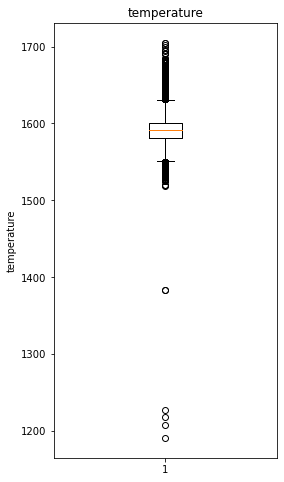

In [67]:
view_box(df_temp['temperature'], None)

Наблюдаются выбросы в обе стороны. Но как мы уже убедились, многие из них связаны с особенностями в процессе производства. В данном случае, меня интересуют только те выбросы которые ниже значения 1400 градусов.

Изучим их внимательнее:

In [68]:
df_temp[df_temp['temperature'] < 1400].sort_values(by='temperature', ascending=False)

,key,measurement_time,temperature
8913,1818,2019-07-07 00:30:49,1383.0
8914,1818,2019-07-07 00:31:40,1383.0
10127,2052,2019-07-21 14:51:40,1227.0
7958,1619,2019-06-30 11:03:54,1218.0
5978,1214,2019-06-16 05:32:00,1208.0
4350,867,2019-06-04 14:21:00,1191.0


Понаблюдаем за процессом, пойдём от большего значения к мельшему:

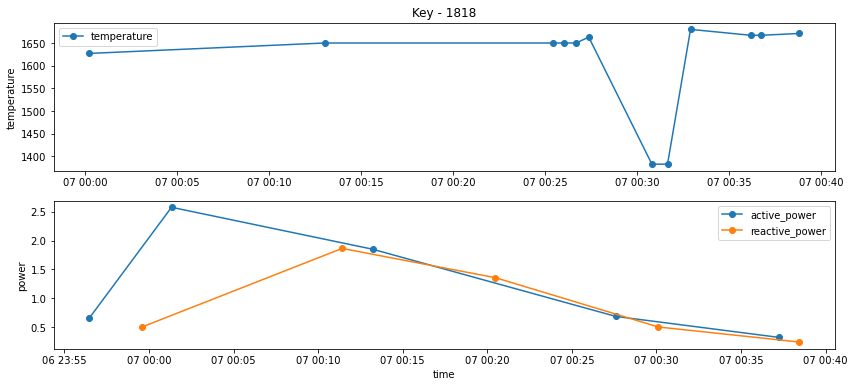

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time


In [69]:
process_visualisation(1818)

Тут у нас явно наблюдается какая-то аномалия. В течении десяти минут, температура сплава не могла так резко упасть и снова возрости. К тому-же у нас нет информации о добавлении материалов. Такую партию надо отбраковывать.

Поехали дальше:

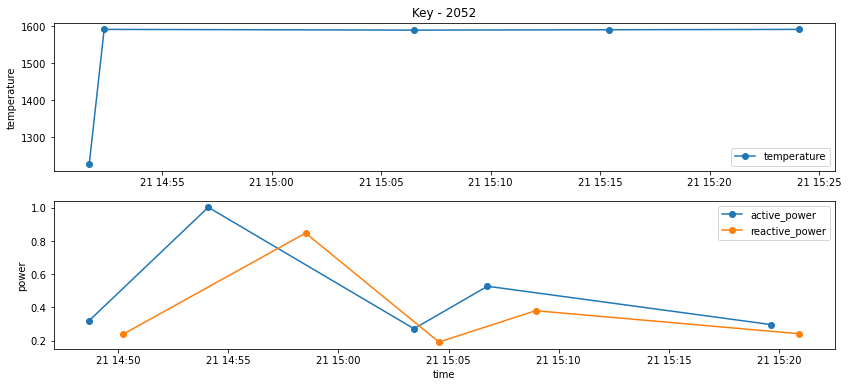

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
1982,2052,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,100.0,103.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
1982,2052,0,0,0,2019-07-21 15:11:42,0,0,0,0,0,0,0,2019-07-21 14:54:43,0,2019-07-21 14:54:43,2019-07-21 14:54:43


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1955,2052,116.014076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
1955,2052,2019-07-21 15:11:16,0,0,0,0,0,0,0,0


In [70]:
process_visualisation(2052)

Тут возможно был небольшой объём в партии, судя по тому, что добавлялся небольшой объём материалов и температура поддерживалась относительно небольшой мощностью. Думаю эту партию можно попробовать оставить.

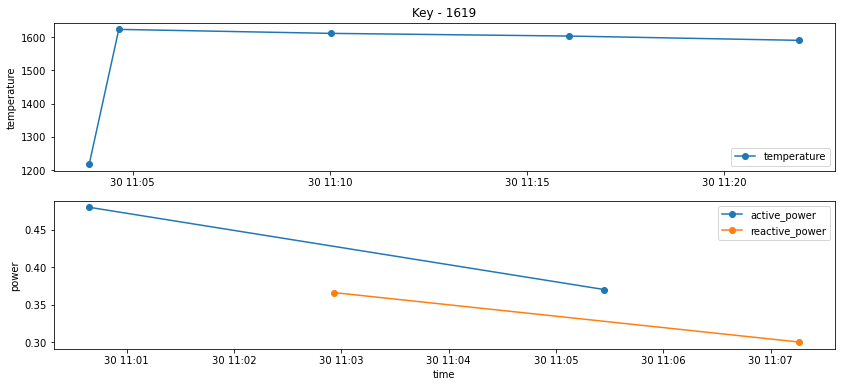

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
1561,1619,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
1561,1619,0,0,2019-06-30 11:20:36,0,0,0,0,0,0,0,0,0,0,0,0


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1540,1619,155.141998,45.17968,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
1540,1619,2019-06-30 11:09:09,2019-06-30 11:21:02,0,0,0,0,0,0,0


In [71]:
process_visualisation(1619)

Тоже какая-то маленькая партия. Весь процесс в две итерации нагрева и мало добавленных матариалов.

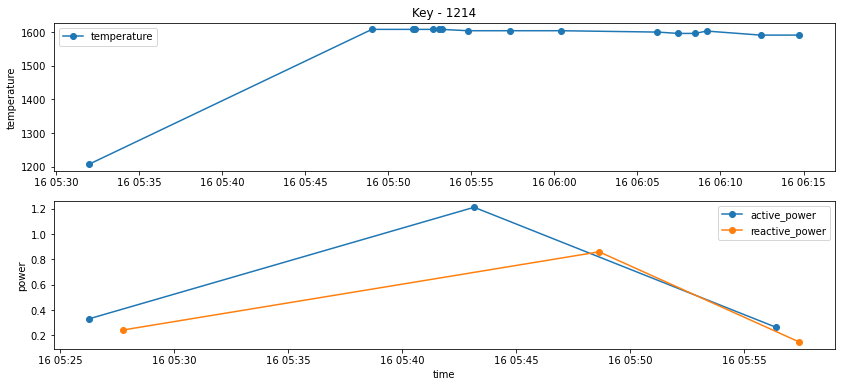

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
1166,1214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,124.0,101.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
1166,1214,0,0,0,0,0,0,0,0,0,0,0,2019-06-16 05:45:30,0,2019-06-16 05:45:30,2019-06-16 05:45:30


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
1146,1214,53.118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
1146,1214,2019-06-16 05:50:12,0,0,0,0,0,0,0,0


In [72]:
process_visualisation(1214)

И эта партия похоже была небольшая. Всего три итерации нагрева. Но судя по количеству измерений температуры, её активно продували газом, чтобы не перегреть.

И наконец последняя партия:

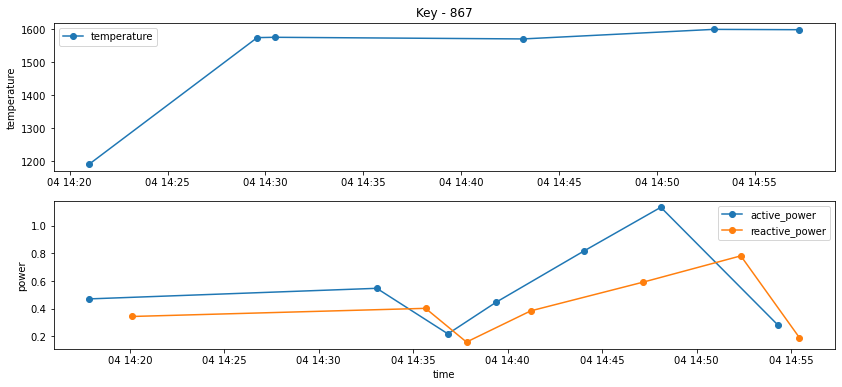

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
832,867,0.0,0.0,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,117.0,104.0


,key,bulk 1 time,bulk 2 time,bulk 3 time,bulk 4 time,bulk 5 time,bulk 6 time,bulk 7 time,bulk 8 time,bulk 9 time,bulk 10 time,bulk 11 time,bulk 12 time,bulk 13 time,bulk 14 time,bulk 15 time
832,867,0,0,2019-06-04 14:43:10,0,0,0,0,0,0,0,0,2019-06-04 14:38:05,0,2019-06-04 14:38:05,2019-06-04 14:38:05


,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
813,867,158.511604,35.07608,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire 1 time,wire 2 time,wire 3 time,wire 4 time,wire 5 time,wire 6 time,wire 7 time,wire 8 time,wire 9 time
813,867,2019-06-04 14:32:56,2019-06-04 14:43:58,0,0,0,0,0,0,0


In [73]:
process_visualisation(867)

И тут похожая ситуация с предыдущими.

Похоже, что маленькие партии начинают греть с относительно небольшой температуры, чтобы не перерасходовать газ на охлаждение, так как они быстро нагреваются.

Вывод остаётся прежним:<br>
Практически все выбросы - результат различных ситуаций при производстве стали. Отбрасывать их нет смысла, иначе модель не сможет адекватно сделать предсказания в подобных случаях.

У нас только 1818-я партия отазалась бракованной. Удалять её из выборок я сейчас не буду, так как она и так будет удалена после объединения таблиц. Потому что у нас нет о ней информаци в таблицах с материалами и в общей таблице она будет иметь пропуски.

Кстати, после всех наблюдений у меня возникла такая мысль:<br>
Было бы полезным, к уже имеющимся данным добавить информацию о массе каждой партии. Это помогло бы получить более качественную картину о происходящих процессах. И скорее всего, принесло бы пользу для обучения модели.

### Объединение таблиц и создание признаков

Перед тем как объединять данные в общую таблицу, нам надо сделать две вещи:
1. В таблице с электродами создать признак - время нагрева, потому что колонки с датами в общую таблицу не попадут и тогда мы потеряем возможно важный признак.
2. Из таблицы с температурой сплава надо отделить последнее измерение, так как это наш целевой признак и если мы его не отделим, то получим утечку.

Итак, создадим признак со временем нагрева в секундах:

In [74]:
df_arc['heating_time_seconds'] = pd.to_numeric((df_arc['arc_heating_end'] - df_arc['arc_heating_start']) / 10e8)
df_arc.head()

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,heating_time_seconds
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148


Проверим, верно-ли создался признак. возьмём первую строчку и рассчитаем разницу во времени в секундах:

In [75]:
(((11 * 60 + 6) * 60) + 2) - (((11 * 60 + 2) * 60) + 14)

228

Рассчёт сходится.

Теперь ещё добавим признак, который возможно пригодится. Попробуем создать коэффициент силы нагрева, разделим реактивную мощность на активную и умножим на продолжительнось нагрева. Возможно у него будет высокая корреляция с признаками из которых мы его рассчитывали, посмотрим на это, когда общая таблица будет готова.

In [76]:
df_arc['power_coef'] = df_arc['reactive_power'] / df_arc['active_power'] * df_arc['heating_time_seconds']
df_arc.head()

,key,arc_heating_start,arc_heating_end,active_power,reactive_power,heating_time_seconds,power_coef
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228,160.497602
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185,119.478556
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172,115.258926
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365,233.748995
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148,88.531752


Далее, нам надо отделить целевой признак из таблицы с температурой.

In [77]:
df_last_temp = df_temp[['key', 'temperature']].groupby(['key'], as_index=False).tail(1)
df_last_temp.head()

,key,temperature
4,1,1613.0
10,2,1602.0
15,3,1599.0
18,4,1625.0
20,5,1602.0


Получили таблицу с последними измерениями температуры.

Теперь надо эти измерения удалить из общей таблицы с температурой.

In [78]:
df_temp = df_temp.drop(df_last_temp.index)

In [79]:
df_temp.head(17)

,key,measurement_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0
11,3,2019-05-03 12:13:17,1596.0


Последние измерения температуры каждой партии удалены.

Теперь возьмём первичные значения температуры у каждой партии, чтобы использовать их как один из признаков для обучения. Утечки в этом признаке быть не должно, так как это первичное измерение и подсказать конечный результат она не может. Плюс на производстве, это то значение, которое мы знаем сразу и модель, при предсказании так-же сможет использовать эту информацию.

In [80]:
df_first_temp = df_temp[['key', 'temperature']].groupby(['key'], as_index=False).head(1)
df_first_temp = rename_columns(df_first_temp, ['key', 'first_temp'])
df_first_temp.head()

,key,first_temp
0,1,1571.0
5,2,1581.0
11,3,1596.0
16,4,1601.0
19,5,1576.0


Теперь нам нужно создать общую таблицу и добавить сгруппированные признаки. Сперва возьмём целевой признак и будем добавлять к нему остальные. Температурные показатели использовать мы не будем, так как через них мы можем получить утечку. Добавим только первичное измерение температуры.

In [81]:
df_grouped = df_last_temp.copy()

In [82]:
def group_and_add(df, df_new, column, new_column, method):
    '''
    Функция, которая присоединяет к датафрейму колонку сгруппированную по выбранному методу.
    '''
    df_new[new_column] = df.groupby(['key'], as_index=False)[column].agg(
    {column:method})[column]
    return df_new

Присоединим первичные измерения температуры:

In [83]:
df_grouped = df_grouped.merge(df_first_temp, on='key', how='left')
df_grouped.head()

,key,temperature,first_temp
0,1,1613.0,1571.0
1,2,1602.0,1581.0
2,3,1599.0,1596.0
3,4,1625.0,1601.0
4,5,1602.0,1576.0


Далее создадим сгруппированную таблицу из таблицы с тенами. Создадим в ней признаки с медианными и суммарными значениями, и присоединим её к общей таблице:

In [85]:
df_arc_grouped = pd.DataFrame(df_arc['key'].unique(), columns=['key'])
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'active_power', 'count_ark_times', 'count')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'heating_time_seconds', 'heating_time_med', 'median')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'heating_time_seconds', 'heating_time_sum', 'sum')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'active_power', 'act_pwr_med', 'median')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'active_power', 'act_pwr_sum', 'sum')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'reactive_power', 'react_pwr_med', 'median')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'reactive_power', 'react_pwr_sum', 'sum')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'power_coef', 'pwr_coef_med', 'median')
df_arc_grouped = group_and_add(df_arc, df_arc_grouped, 'power_coef', 'pwr_coef_sum', 'sum')
df_grouped = df_grouped.merge(df_arc_grouped, on='key', how='left')
df_grouped.head()

,key,temperature,first_temp,count_ark_times,heating_time_med,heating_time_sum,act_pwr_med,act_pwr_sum,react_pwr_med,react_pwr_sum,pwr_coef_med,pwr_coef_sum
0,1,1613.0,1571.0,5.0,185.0,1098.0,0.805607,4.878147,0.520285,3.183241,119.478556,717.515832
1,2,1602.0,1581.0,4.0,173.5,811.0,0.659060,3.052598,0.411077,1.998112,109.825454,530.890989
2,3,1599.0,1596.0,5.0,109.0,655.0,0.429355,2.525882,0.271774,1.599076,68.995233,414.648024
3,4,1625.0,1601.0,4.0,182.0,741.0,0.781301,3.209250,0.518548,2.060298,120.927810,476.136851
4,5,1602.0,1576.0,4.0,191.5,869.0,0.729026,3.347173,0.511438,2.252643,134.396665,585.241713


Теперь присоединим сюда таблицу с газом:

In [86]:
df_grouped = df_grouped.merge(df_gas, on='key', how='left')
df_grouped.head()

,key,temperature,first_temp,count_ark_times,heating_time_med,heating_time_sum,act_pwr_med,act_pwr_sum,react_pwr_med,react_pwr_sum,pwr_coef_med,pwr_coef_sum,gas
0,1,1613.0,1571.0,5.0,185.0,1098.0,0.805607,4.878147,0.520285,3.183241,119.478556,717.515832,29.749986
1,2,1602.0,1581.0,4.0,173.5,811.0,0.659060,3.052598,0.411077,1.998112,109.825454,530.890989,12.555561
2,3,1599.0,1596.0,5.0,109.0,655.0,0.429355,2.525882,0.271774,1.599076,68.995233,414.648024,28.554793
3,4,1625.0,1601.0,4.0,182.0,741.0,0.781301,3.209250,0.518548,2.060298,120.927810,476.136851,18.841219
4,5,1602.0,1576.0,4.0,191.5,869.0,0.729026,3.347173,0.511438,2.252643,134.396665,585.241713,5.413692


Осталось сгруппировать таблицы с материалами по суммам добавленных материалов и тоже присоединить.

In [87]:
df_bulk_grouped = df_bulk.groupby(['key'], as_index=False).sum()
df_wire_grouped = df_wire.groupby(['key'], as_index=False).sum()
df_grouped = df_grouped.merge(df_bulk_grouped, on='key', how='left')
df_grouped = df_grouped.merge(df_wire_grouped, on='key', how='left')
df_grouped

,key,temperature,first_temp,count_ark_times,heating_time_med,heating_time_sum,act_pwr_med,act_pwr_sum,react_pwr_med,react_pwr_sum,...,bulk 15,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
0,1,1613.0,1571.0,5.0,185.0,1098.0,0.805607,4.878147,0.520285,3.183241,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1602.0,1581.0,4.0,173.5,811.0,0.659060,3.052598,0.411077,1.998112,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1599.0,1596.0,5.0,109.0,655.0,0.429355,2.525882,0.271774,1.599076,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1625.0,1601.0,4.0,182.0,741.0,0.781301,3.209250,0.518548,2.060298,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1602.0,1576.0,4.0,191.5,869.0,0.729026,3.347173,0.511438,2.252643,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2495,1591.0,1570.0,4.0,195.0,723.0,0.856645,3.210690,0.643309,2.360777,...,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2473,2496,1591.0,1554.0,6.0,139.0,940.0,0.622022,4.203064,0.424336,2.810185,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,2497,1589.0,1571.0,3.0,206.0,569.0,0.796857,2.212379,0.645539,1.851269,...,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,2498,1594.0,1591.0,5.0,133.0,750.0,0.598447,3.408725,0.412770,2.355428,...,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Получили общую таблицу.

У нас были несовпадения по количеству партий. Посмотрим на пропуски:

In [88]:
df_grouped.isna().sum()

key                   0
temperature           0
first_temp            2
count_ark_times       2
heating_time_med      2
heating_time_sum      2
act_pwr_med           2
act_pwr_sum           2
react_pwr_med         2
react_pwr_sum         2
pwr_coef_med          2
pwr_coef_sum          2
gas                   2
bulk 1               69
bulk 2               69
bulk 3               69
bulk 4               69
bulk 5               69
bulk 6               69
bulk 7               69
bulk 8               69
bulk 9               69
bulk 10              69
bulk 11              69
bulk 12              69
bulk 13              69
bulk 14              69
bulk 15              69
wire 1              104
wire 2              104
wire 3              104
wire 4              104
wire 5              104
wire 6              104
wire 7              104
wire 8              104
wire 9              104
dtype: int64

Имеются по паре пропусков в основных колонках и пропуски в материалах. Как раз те самые, которые наблюдались при изучении выбросов.

Такие партии нам не подойдут, поэтому удалим их из общей таблицы и для удобства сбросим индексы:

In [89]:
df_grouped = df_grouped.dropna().reset_index(drop=True)
df_grouped.isna().sum()

key                 0
temperature         0
first_temp          0
count_ark_times     0
heating_time_med    0
heating_time_sum    0
act_pwr_med         0
act_pwr_sum         0
react_pwr_med       0
react_pwr_sum       0
pwr_coef_med        0
pwr_coef_sum        0
gas                 0
bulk 1              0
bulk 2              0
bulk 3              0
bulk 4              0
bulk 5              0
bulk 6              0
bulk 7              0
bulk 8              0
bulk 9              0
bulk 10             0
bulk 11             0
bulk 12             0
bulk 13             0
bulk 14             0
bulk 15             0
wire 1              0
wire 2              0
wire 3              0
wire 4              0
wire 5              0
wire 6              0
wire 7              0
wire 8              0
wire 9              0
dtype: int64

In [90]:
df_grouped

,key,temperature,first_temp,count_ark_times,heating_time_med,heating_time_sum,act_pwr_med,act_pwr_sum,react_pwr_med,react_pwr_sum,...,bulk 15,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
0,1,1613.0,1571.0,5.0,185.0,1098.0,0.805607,4.878147,0.520285,3.183241,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1602.0,1581.0,4.0,173.5,811.0,0.659060,3.052598,0.411077,1.998112,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1599.0,1596.0,5.0,109.0,655.0,0.429355,2.525882,0.271774,1.599076,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1625.0,1601.0,4.0,182.0,741.0,0.781301,3.209250,0.518548,2.060298,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1602.0,1576.0,4.0,191.5,869.0,0.729026,3.347173,0.511438,2.252643,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,1591.0,1570.0,4.0,195.0,723.0,0.856645,3.210690,0.643309,2.360777,...,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2325,2496,1591.0,1554.0,6.0,139.0,940.0,0.622022,4.203064,0.424336,2.810185,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2326,2497,1589.0,1571.0,3.0,206.0,569.0,0.796857,2.212379,0.645539,1.851269,...,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2327,2498,1594.0,1591.0,5.0,133.0,750.0,0.598447,3.408725,0.412770,2.355428,...,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Данные готовы к моделированию.

### Создание выборок

Прежде, чем приступить к разделению на выборки, проверим данные на мультиколлинеарность. Посмотрим на корреляции между признаками:

In [91]:
def show_correlogram(df):
    '''
    Функция для построения визуализации корреляции между признаками.
    '''
    plt.figure(figsize=(16,16), dpi= 80)
    sns.heatmap(
        df.corr(), xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, cbar=False)

    plt.title('Correlogram between features', fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

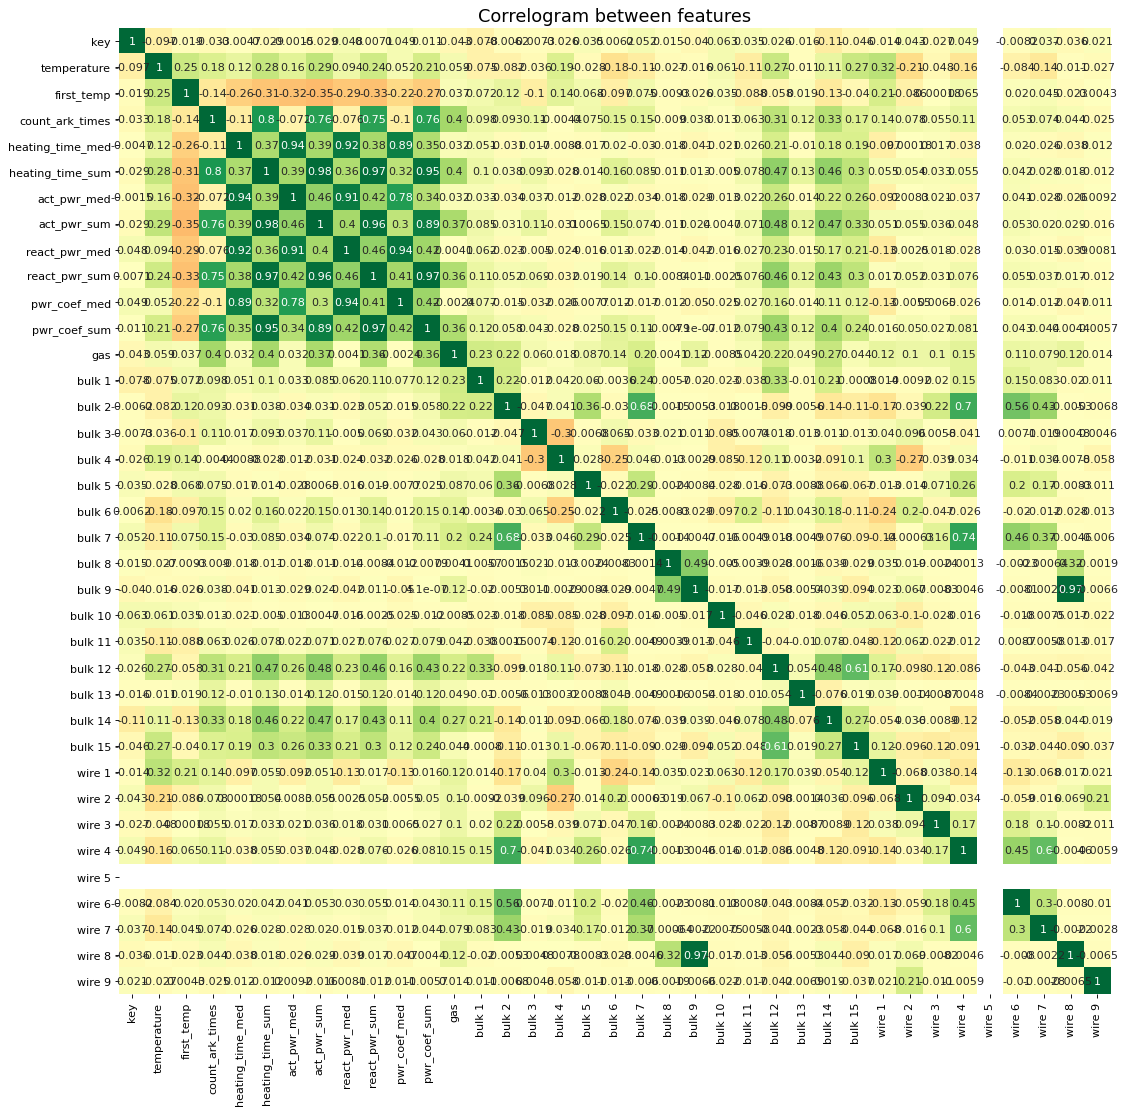

In [92]:
show_correlogram(df_grouped)

Высокой корреляции между целевым признаком и остальными признаками не наблюдается. Наблюдаются высокие корреляции между показателями нагрева. И как я предпологал, коеффициент мощности сильно коррелирует со всеми показателями нагрева. Значит у нас есть признак, который вобрал в себя все показатели нагрева. В таком случае, мы можем убрать все эти показатели и оставить только коэффициенты.

Плюс ещё есть высокая корреляция между `bulk 9` и `wire 8`. И у `wire 5` все значения нулевые, поэтому нет корреляции вообще.

Значит, чтобы не плодить сущности и немного упростить обучение модели уберём колонки:
- с показателями нагрева;
- `wire 8` и `wire 5`.

In [93]:
df_grouped = df_grouped.drop(
    ['heating_time_med', 'heating_time_sum', 'act_pwr_med',
     'act_pwr_sum', 'react_pwr_med', 'react_pwr_sum', 'wire 5', 'wire 8'],
    axis=1
)

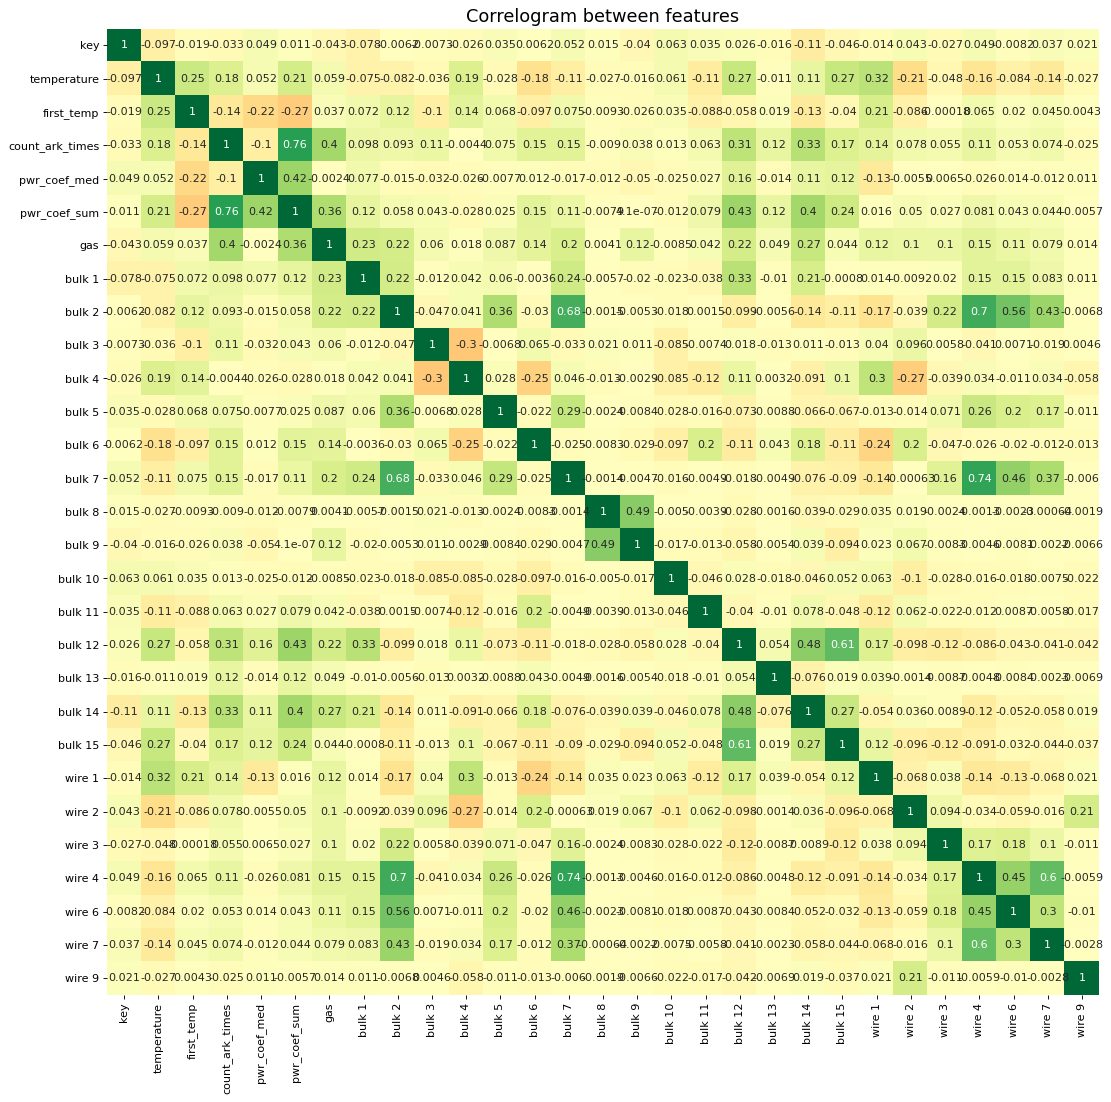

In [94]:
show_correlogram(df_grouped)

Теперь, предельно высоких корреляций не наблюдается. Можно приступать к разделению на выборки.

Разделим на фичи и таргет, а после отделим 20% данных на тестовую выборку.

In [95]:
X = df_grouped.drop(['key', 'temperature'], axis=1)
y = df_grouped['temperature']

In [96]:
print('Features: {}'.format(X.shape), 'Target:   {}'.format(y.shape), sep='\n')

Features: (2329, 27)
Target:   (2329,)


In [97]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=555)

In [98]:
print(
    'Features:      {}'.format(X.shape),
    'Target:        {}'.format(y.shape),
    'Features test: {}'.format(X_test.shape),
    'Target test:   {}'.format(y_test.shape),
    sep='\n'
)

Features:      (1863, 27)
Target:        (1863,)
Features test: (466, 27)
Target test:   (466,)


## Обучение модели

Попробуем обучить несколько моделей и посмотрим на результаты.

Так как выборка получилась относительно небольшая, воспользуемся кросс-валидацией.

Сначала попробуем модели Линейная регрессия и Случайный лес, и по результатам посмотрим метрики, а так-же какие признаки окажутся наиболее важными.

Создадим функцию для кросс-валидации и подбора лучших параметров модели:

In [99]:
def search_best_model(model, model_name, params, X, y):
    '''
    Функция по подбору лучшей модели с помощью GridSearchCV.
    '''
    print('<<<-------------------...Searching for best model...------------------->>>')
    clf = GridSearchCV(model, params, scoring='neg_mean_absolute_error', n_jobs=4, cv=5, verbose=2)
    clf.fit(X, y)
    score = -1 * clf.best_score_
    print('------------------->>>Best model found successfully!<<<-------------------')
    print('\nBest {} MAE:'.format(model_name), score, '\nBest {} model:'.format(model_name), clf.best_estimator_)
    return score, clf.best_estimator_

Посмотрим на результат Линейной регрессии:

In [100]:
linear_score, linear_model = search_best_model(
    model=LinearRegression(),
    model_name='LinearRegression',
    params={},
    X=X, y=y
)

<<<-------------------...Searching for best model...------------------->>>
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


------------------->>>Best model found successfully!<<<-------------------

Best LinearRegression MAE: 7.448738037008856 
Best LinearRegression model: LinearRegression()


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.8s finished


Неплохой результат, посмотрим теперь на Случайный лес. Заодно подберём параметры:

In [101]:
best_forest_score, best_forest_model = search_best_model(
    model=RandomForestRegressor(),
    model_name='Random Forest',
    params={'n_estimators': range(10, 110, 10), 'max_depth': range(1, 11), 'random_state': [555]},
    X=X, y=y
)

<<<-------------------...Searching for best model...------------------->>>
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 481 tasks      | elapsed:   49.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   54.1s finished


------------------->>>Best model found successfully!<<<-------------------

Best Random Forest MAE: 6.706583790195912 
Best Random Forest model: RandomForestRegressor(max_depth=8, random_state=555)


Результат ещё лучше чем у регрессии.

Теперь посмотрим, какие признаки оказались наиболее важными для этих моделей. Сделаем функцию для визуализации:

In [102]:
def importances(model, model_name):
    '''
    Функция для визуализации наиболее важных признаков у выбранной модели.
    '''
    model.fit(X, y)
    result = permutation_importance(model, X, y, scoring='neg_mean_absolute_error', n_jobs=4, random_state=555)
    per_imp = pd.DataFrame(result.importances_mean, index=X.columns, columns=['permutation_importances'])
    
    per_imp.sort_values(by=['permutation_importances']).plot(
        kind='barh', title='Permutation importances {}'.format(model_name), figsize=(10, 8)
    )
    plt.show()
    return per_imp

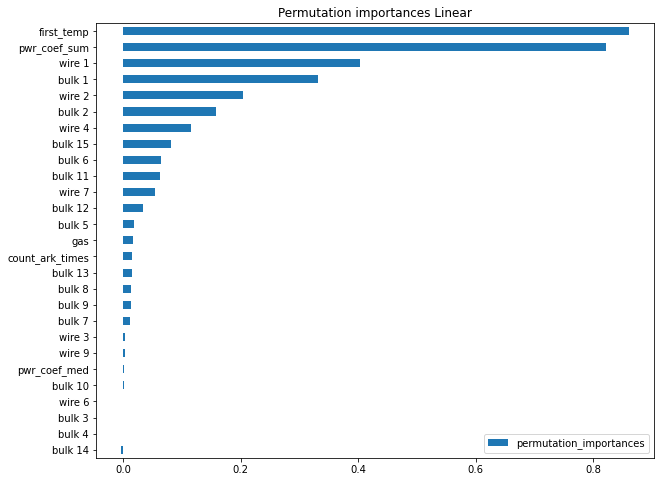

In [103]:
linear_importances = importances(linear_model, 'Linear')

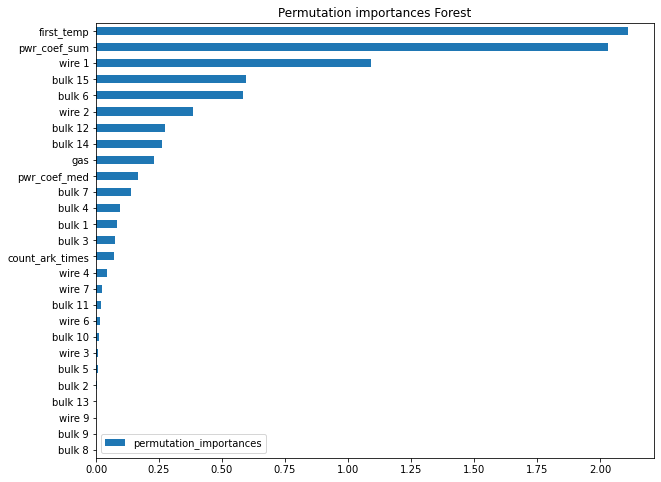

In [104]:
forest_importances = importances(best_forest_model, 'Forest')

Как видно, наиболее важными признаками оказались некоторые из материалов, суммарный коэффициент мощности и первичная температура.

Наименее важными оказались ряд материалов. Надо попробовать удалить из выборки все, что ниже `bulk 3` по важности, и снова посмотреть на результат.

In [105]:
not_important_features = list(
    forest_importances[forest_importances['permutation_importances'] < 0.05]
    .sort_values(by='permutation_importances', ascending=False).index
)
not_important_features

['wire 4',
 'wire 7',
 'bulk 11',
 'wire 6',
 'bulk 10',
 'wire 3',
 'bulk 5',
 'bulk 2',
 'bulk 13',
 'wire 9',
 'bulk 9',
 'bulk 8']

In [106]:
X = X.drop(not_important_features, axis=1)
X_test = X_test.drop(not_important_features, axis=1)

Не особо выжные признаки удалены. Посмотрим, не снизилось-ли качество предсказаний. 

In [107]:
linear_score, linear_model = search_best_model(
    model=LinearRegression(),
    model_name='LinearRegression',
    params={},
    X=X, y=y
)

<<<-------------------...Searching for best model...------------------->>>
Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------->>>Best model found successfully!<<<-------------------

Best LinearRegression MAE: 7.027387572699729 
Best LinearRegression model: LinearRegression()


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


In [108]:
best_forest_score, best_forest_model = search_best_model(
    model=RandomForestRegressor(),
    model_name='Random Forest',
    params={'n_estimators': range(10, 210, 20), 'max_depth': range(1, 16),
            'min_samples_leaf': range(1, 4), 'random_state': [555]},
    X=X, y=y
)

<<<-------------------...Searching for best model...------------------->>>
Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 254 tasks      | elapsed:   24.3s
[Parallel(n_jobs=4)]: Done 457 tasks      | elapsed:   57.1s
[Parallel(n_jobs=4)]: Done 740 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1105 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 1550 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 2077 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 2250 out of 2250 | elapsed: 10.1min finished


------------------->>>Best model found successfully!<<<-------------------

Best Random Forest MAE: 6.665802859016935 
Best Random Forest model: RandomForestRegressor(max_depth=11, min_samples_leaf=3, n_estimators=190,
                      random_state=555)


В результате получили улучшение качества у линейной модели, а у Случайного леса качество осталось почти на том-же уровне.

Значит, можно оставить такой набор данных, чтобы было проще обучать более "тяжёлые" модели. 

Теперь обучим модель Градиентного бустинга. Как и у Случайного леса будем сразу подбирать лушие параметры:

In [108]:
best_gbm_score, best_gbm_model = search_best_model(
    model=GradientBoostingRegressor(),
    params={'loss': ['huber'], 'learning_rate': [0.1], 'random_state': [555],
            'n_estimators': range(10, 90, 10), 'max_depth': range(1, 11), 'criterion': ['mae']}, 
    model_name='GradientBoosting',
    X=X, y=y 
)

<<<-------------------...Searching for best model...------------------->>>
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   45.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 27.7min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed: 31.7min finished


------------------->>>Best model found successfully!<<<-------------------

Best GradientBoosting MAE: 6.6479280514996315 
Best GradientBoosting model: GradientBoostingRegressor(criterion='mae', loss='huber', max_depth=4,
                          n_estimators=80, random_state=555)


Результат не хуже, чем у Случайного Леса.

И ещё попробуем модель CatBoost, тоже сразу подберём лучшие параметры:

In [109]:
best_cb_score, best_cb_model = search_best_model(
    model=CatBoostRegressor(),
    params={'iterations': range(100, 360, 10), 'learning_rate': [0.01], 'loss_function': ['MAE'],
            'max_depth': range(1, 11), 'random_seed': [555], 'verbose': [0]}, 
    model_name='CatBoost',
    X=X, y=y
)

<<<-------------------...Searching for best model...------------------->>>
Fitting 5 folds for each of 260 candidates, totalling 1300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed: 24.7min finished


------------------->>>Best model found successfully!<<<-------------------

Best CatBoost MAE: 6.697079806890753 
Best CatBoost model: <catboost.core.CatBoostRegressor object at 0x7ff05ef038e0>


Результат, тоже близкий к остальным моделям.

Посмотрим теперь на все результаты моделей:

In [110]:
valid_results = pd.DataFrame(
    (linear_score, best_forest_score, best_gbm_score, best_cb_score),
    index=['Linear Model', 'RandomForest Model', 'GradientBoosting Model', 'CatBoost Model'],
    columns=['Models validation MAE']
)
valid_results.sort_values(by='Models validation MAE')

,Models validation MAE
GradientBoosting Model,6.647928
RandomForest Model,6.662252
CatBoost Model,6.697080
Linear Model,7.020462


По результатам валидации лучше всего справились, с практически одинаковыми результатами, модели: Случайный лес и модель Градиентного бустинга. Посмотрим что наши лучшие модели покажут на тесте.

## Тест модели

Осталось протестировать лучшие модели на тестовой выборке и посмотреть, какая лучше всего подойдёт для поставленной задачи. Для улучшения качества, обучим наши модели на полной выборке, а после будем тестировать. Дополнительно внедрим Дамми модель для проверки наших моделей на адекватность предсказаний.

Посмотрим на результаты:

In [111]:
def test_and_score(model):
    '''
    Функция по обучению модели на всей выборке и выводу оценки на тестовой выборке.
    '''
    model.fit(X, y)
    return mean_absolute_error(y_test, model.predict(X_test))

In [112]:
final_results = pd.DataFrame(
     (
         [linear_score, test_and_score(linear_model)],
         [best_forest_score, test_and_score(best_forest_model)],
         [best_gbm_score, test_and_score(best_gbm_model)],
         [best_cb_score, test_and_score(best_cb_model)],
         ['----------', test_and_score(DummyRegressor())]
     ), 
    index=['Linear Model', 'RandomForest Model', 'GradientBoosting Model', 'CatBoost Model', 'Dummy Model'],
    columns=['Models validation MAE', 'Models test MAE']
)
final_results.sort_values(by='Models test MAE')

,Models validation MAE,Models test MAE
CatBoost Model,6.69708,6.178194
RandomForest Model,6.66225,6.270750
GradientBoosting Model,6.64793,6.290621
Linear Model,7.02046,6.479947
Dummy Model,----------,7.791230


## Выводы

В целом, все модели хорошо справились с задачей превзойдя пороговое значение метрики MAE: 8.7 единиц. И успешно прошли проверку на адекватность. Лучшей, с небольшим отрывом, оказалась модель: CatBoost.

Стоит отметить, что скорости обучения моделей бустинга были самыми большими. Но на производстве, скорее всего скорость обучения будет играть не такую большую роль, как скорость и качество предсказания. И поэтому качество предсказаний скорее всего будет в приоритете.

Значит можно смело порекомендовать модели градиентного бустинга, которые смогут точнее предсказывать температуру сплава на выходе и таким образом оптимизировать производство и экономить на затратах на электроэнергию.

## Отчёт

В проекте были выполнены все шаги, которые были запланированы:
- Проведена подготовка данных: проработаны пропуски, данные переведены в нужные форматы, исправлены названия колонок.
- Проведён подробный анализ данных: проведена проверка на корректность сбора данных, подробно изучен процесс производства, изучены выбросы в данных и выявлены ошибки в сборе данных.
- Произведена подготовка данных к моделированию: исключена ошибочная информация, создана общая таблица с необходимыми признаками, добавлены вспомогательные признаки и исключены излишне коррелирующие признаки.
- Проведено моделирование: найдены и исключены признаки не влияющие на качество моделей, выбраны наиболее качественно предсказывающие модели, проведена проверка на адекватность предсказания моделей, проведено тестирование и выбор лучшей модели.

В процессе выполнения проекта, столкнулся с трудностью изначального понимания природы появления пропусков и аномалий в данных. Но с помощью комплексного подхода в изучении данных и методов визуализации, процессы производства стали намного более понятными и это помогло эффективно провести анализ и подготовку данных к моделированию.

Ключевыми шагами в решении задачи хочу отметить:
- Качественная предобработка данных.
- Выяснение ключевых моментов связанных с процессом производства.
- Правильная очистка и подготовка данных за счёт понимания проходящих на производстве процессов.
- Качественное моделирование и оценка моделей.

Лучшая модель по итогам проведения тестов: CatBoostRegressor.<br>
Результат тестирования модели по метрике RMSE: 6.178.

Хочется отметить, что модель довольно долго обучалась с учётом того, что помимо обучения модели, проводился подбор параметров и делалась кросс-валидация. Но предсказания обученой модели происходят достаточно быстро, чтобы процесс производства проходил в штатном режиме.

Хочу добавить, что в процессе изучения данных и моделирования, было обнаружено, что наиболее важными факторами для предсказания конечной температуры, оказались: первичное измерение температуры и коэффициент затраченной мощности на производство каждой партии стали. Возможно, для оптимизации производства с целью экономии электроэнергии, пригодится не только иметь предсказания температуры, но и обратить внимание на вышеперечисленные факторы и их влияние на конечный результат.